In [ ]:
'''>>>>> 
Keras model for comparison with first principles model'''

#import useful packages
import keras
import pandas as pd
from keras.models import Sequential
import numpy as np
import keras.backend as kb
import tensorflow as tf
#the follwoing 2 lines are only needed for Mac OS machines
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

#raw data in dictionary form x01, x02, x03, y3
my_dict = { 
    'x01' : [20., 20., 20., 20.2, 20., 20.2, 24.0, 36.],
    'x02' : [13., 14.5, 15.3, 13., 14.5, 15.3, 13., 14.5],
    'x03' : [310.8, 308.0, 306.0, 310.8, 308.0, 306.0, 310.8, 308.0],
    'y3' : [30.97, 32.3, 31.5, 30.91, 32.5, 31.4, 35.59, 46.4]
}
#normalized inputs in array
xdata = []
xdata = [[20./20.2, 13.0/14.5, 310.8/308.0], [20./20.2, 14.5/14.5, 308.0/308.0]] 
xdata.append([20./20.2, 15.3/14.5, 306.0/308.0])
xdata.append([20.2/20.2, 13.0/14.5, 310.8/308.0]) 
xdata.append([20./20.2, 14.5/14.5, 308.0/308.0]) 
xdata.append([20.2/20.2, 15.3/14.5, 306.0/308.0]) 
xdata.append([24./20.2, 13.0/14.5, 310.8/308.0]) 
xdata.append([36./20.2, 14.5/14.5, 308.0/308.0]) 

#data frame
df = pd.DataFrame(my_dict)
#devide by the median to normalize 
df.x01= df.x01/20.2
df.x02= df.x02/14.5
df.x03= df.x03/308.0
#normalize output array
df.y3= df.y3/32.401
df.head
print (df.x01, df.x02, df.x03, df.y3)

xarray= np.array(xdata)
print (xdata)
print (xarray)

0    0.990099
1    0.990099
2    0.990099
3    1.000000
4    0.990099
5    1.000000
6    1.188119
7    1.782178
Name: x01, dtype: float64 0    0.896552
1    1.000000
2    1.055172
3    0.896552
4    1.000000
5    1.055172
6    0.896552
7    1.000000
Name: x02, dtype: float64 0    1.009091
1    1.000000
2    0.993506
3    1.009091
4    1.000000
5    0.993506
6    1.009091
7    1.000000
Name: x03, dtype: float64 0    0.955835
1    0.996883
2    0.972192
3    0.953983
4    1.003055
5    0.969106
6    1.098423
7    1.432055
Name: y3, dtype: float64
[[0.9900990099009901, 0.896551724137931, 1.009090909090909], [0.9900990099009901, 1.0, 1.0], [0.9900990099009901, 1.0551724137931036, 0.9935064935064936], [1.0, 0.896551724137931, 1.009090909090909], [0.9900990099009901, 1.0, 1.0], [1.0, 1.0551724137931036, 0.9935064935064936], [1.188118811881188, 0.896551724137931, 1.009090909090909], [1.7821782178217822, 1.0, 1.0]]
[[0.99009901 0.89655172 1.00909091]
 [0.99009901 1.         1.        ]
 [0.990

In [ ]:
# define model

#As seen below, we have created three dense layers each with just one neuron. 
#A dense layer is a layer in neural network that’s fully connected. 
#In other words, all the neurons in one layer are connected to all other neurons in the next layer.
#In the first layer, we need to provide the input shape, which is 3 in this case. 
#The activation function we have chosen is ReLU, which stands for rectified linear unit.

from keras import backend as K
#initialize weights with values between -0.2 and 1.2
initializer = keras.initializers.RandomUniform(minval= -0.2, maxval=1.2)

# define three layer model with one neuron in each layer
model = keras.Sequential([
    keras.layers.Dense(1, activation=K.elu, input_shape=[3],  kernel_initializer=initializer, name="dense_one"),
    keras.layers.Dense(1, activation=K.elu,  kernel_initializer=initializer, name="dense_two"),
    keras.layers.Dense(1, activation=K.elu,  kernel_initializer=initializer, name="dense_three")
  ])


#set starting values to those used in first principles model
#w01n =  1.2214114647164782
#w02n =  0.3889371041283475
#w03n =  0.688983355933903
#b1n =  -0.16101132060984205
#w12n =  0.7168491242083397
#b2n =  -0.12791046679526907
#w23n =  0.6967103560817965
#b3n =  0.004475944730426142

w01n =  1.3
w02n =  0.38 
w03n =  0.75
b1n =  -0.14
w12n =  0.75
b2n =  -0.13
w23n =  0.8
b3n =  0.011

weights0 =  [[ w01n], [w02n], [ w03n]]
w0array= np.array(weights0)
print(np.shape(w0array))
bias0 = [b1n]
bias0array= np.array(bias0)
L0=[]
L0.append(w0array)
L0.append(bias0array)
model.layers[0].set_weights(L0) 

weights1 =  [[ w12n]]
w1array= np.array(weights1)
print(np.shape(w1array))
bias1 = [b2n]
bias1array= np.array(bias1)
L1=[]
L1.append(w1array)
L1.append(bias1array)
model.layers[1].set_weights(L1)

weights2 =  [[ w23n]]
w2array= np.array(weights2)
print(np.shape(w2array))
bias2 = [b3n]
bias2array= np.array(bias2)
L2=[]
L2.append(w2array)
L2.append(bias2array)
model.layers[2].set_weights(L2)


print("Weights and biases of the layers before training the model: \n")
for layer in model.layers:
  print(layer.name)
  print("Weights")
  print("Shape: ",layer.get_weights()[0].shape,'\n',layer.get_weights()[0])
  print("Bias")
  print("Shape: ",layer.get_weights()[1].shape,'\n',layer.get_weights()[1],'\n')
model.layers


(3, 1)
(1, 1)
(1, 1)
Weights and biases of the layers before training the model: 

dense_one
Weights
Shape:  (3, 1) 
 [[1.3 ]
 [0.38]
 [0.75]]
Bias
Shape:  (1,) 
 [-0.14] 

dense_two
Weights
Shape:  (1, 1) 
 [[0.75]]
Bias
Shape:  (1,) 
 [-0.13] 

dense_three
Weights
Shape:  (1, 1) 
 [[0.8]]
Bias
Shape:  (1,) 
 [0.011] 



In [ ]:
#We’re using RMSprop as our optimizer here. RMSprop stands for Root Mean Square Propagation. 
#It’s one of the most popular gradient descent optimization algorithms for deep learning networks. 
#RMSprop is an optimizer that’s reliable and fast.
#We’re compiling the mode using the model.compile function. The loss function used here 
#is mean absolute error. After the compilation of the model, we’ll use the fit method with 100 epochs.

#Running model.fit successive times extends the calculation to addtional epochs.

rms = keras.optimizers.RMSprop(0.0035)
model.compile(loss='mean_absolute_error',optimizer=rms)


In [ ]:
#After the compilation of the model, we’ll use the fit method with 500 epochs.
#I started with epochs value of 100 and then tested the model after training. 
#The prediction was not that good. Then I modified the number of epochs to 200 and tested the model again. 
#Accuracy had improved slightly, but figured I’d give it one more try. Finally, at 500 epochs 
#I found acceptable prediction accuracy.

#The fit method takes three parameters; namely, x, y, and number of epochs. 
#During model training, if all the batches of data are seen by the model once, 
#we say that one epoch has been completed.

# Add an early stopping callback
es = tf.keras.callbacks.EarlyStopping(
    monitor='loss', 
    mode='min', 
    patience = 80, 
    restore_best_weights = True, 
    verbose=1)
# Add a checkpoint where loss is minimum, and save that model
mc = tf.keras.callbacks.ModelCheckpoint('best_model.SB', monitor='loss', 
                     mode='min',  verbose=1, save_best_only=True)

historyData = model.fit(xarray,df.y3,epochs=400,callbacks=[es])

loss_hist = historyData.history['loss']
#The above line will return a dictionary, access it's info like this:
best_epoch = np.argmin(historyData.history['loss']) + 1
print ('best epoch = ', best_epoch)
print('smallest loss =', np.min(loss_hist))

Epoch 1/400
1/1 [==============================] - 0s 2ms/step - loss: 0.0141
Epoch 2/400
1/1 [==============================] - 0s 997us/step - loss: 0.0175
Epoch 3/400
1/1 [==============================] - 0s 3ms/step - loss: 0.0141
Epoch 4/400
1/1 [==============================] - 0s 2ms/step - loss: 0.0177
Epoch 5/400
1/1 [==============================] - 0s 2ms/step - loss: 0.0140
Epoch 6/400
1/1 [==============================] - 0s 1ms/step - loss: 0.0180
Epoch 7/400
1/1 [==============================] - 0s 3ms/step - loss: 0.0140
Epoch 8/400
1/1 [==============================] - 0s 1ms/step - loss: 0.0183
Epoch 9/400
1/1 [==============================] - 0s 3ms/step - loss: 0.0139
Epoch 10/400
1/1 [==============================] - 0s 996us/step - loss: 0.0185
Epoch 11/400
1/1 [==============================] - 0s 2ms/step - loss: 0.0138
Epoch 12/400
1/1 [==============================] - 0s 2ms/step - loss: 0.0188
Epoch 13/400
1/1 [==============================] - 0s 3m

1/1 [==============================] - 0s 997us/step - loss: 0.0204
Epoch 104/400
1/1 [==============================] - 0s 0s/step - loss: 0.0170
Epoch 105/400
1/1 [==============================] - 0s 2ms/step - loss: 0.0140
Epoch 106/400
1/1 [==============================] - 0s 998us/step - loss: 0.0172
Epoch 107/400
1/1 [==============================] - 0s 2ms/step - loss: 0.0140
Epoch 108/400
1/1 [==============================] - 0s 998us/step - loss: 0.0175
Epoch 109/400
1/1 [==============================] - 0s 2ms/step - loss: 0.0140
Epoch 110/400
1/1 [==============================] - 0s 2ms/step - loss: 0.0178
Epoch 111/400
1/1 [==============================] - 0s 999us/step - loss: 0.0139
Epoch 112/400
1/1 [==============================] - 0s 0s/step - loss: 0.0180
Epoch 113/400
1/1 [==============================] - 0s 3ms/step - loss: 0.0139
Epoch 114/400
1/1 [==============================] - 0s 998us/step - loss: 0.0183
Epoch 115/400
1/1 [===========================

In [ ]:
from __future__ import print_function
#For results of training network:

#keras.layer.get_weights() function retrieves weight values
first_layer_weights = model.layers[0].get_weights()[0]
w01 = first_layer_weights[0][0]
w02 = first_layer_weights[1][0]
w03 = first_layer_weights[2][0]
first_layer_bias  = model.layers[0].get_weights()[1]
b1 = first_layer_bias
second_layer_weights = model.layers[1].get_weights()[0]
w12 = second_layer_weights[0][0]
second_layer_bias  = model.layers[1].get_weights()[1]
b2 = second_layer_bias
third_layer_weights = model.layers[2].get_weights()[0]
w23 = third_layer_weights[0][0]
third_layer_bias  = model.layers[2].get_weights()[1]
b3 = third_layer_bias

#print weights and biases
print (first_layer_weights)
print ('w01 = ', w01, 'w02 = ', w02, 'w03 = ', w03)
print (first_layer_bias)
print ('b1 = ', b1)
print (second_layer_weights)
print ('w12 = ', w12)
print (second_layer_bias)
print ('b2 = ', b2)
print (third_layer_weights)
print ('w23 = ', w23)
print (third_layer_bias)
print ('b3 = ', b3)

#use model.predict() function to print model predictions for data conditions
xarray= np.array(xdata)
print ('x01/20.2,  x02/14.5,   x03/308.0,  y3/32.4,  a3:')
test = []
for i in range(0,8): 
    test = [[xarray[i][0], xarray[i][1], xarray[i][2]]]
    testarray = np.array(test)
    a3 = model.predict(testarray)
    print (xarray[i][0], xarray[i][1], xarray[i][2], df.y3[i], a3)
print('  ')
print ('x01,  x02,   x03,  y3,  a3*32.4:')
for i in range(0,8): 
    test = [[xarray[i][0], xarray[i][1], xarray[i][2]]]
    testarray = np.array(test)
    a3 = model.predict(testarray)
    print (xarray[i][0]*20.2, xarray[i][1]*14.5, xarray[i][2]*308.0, df.y3[i]*32.4, a3*32.4)

[[1.2167306 ]
 [0.29071605]
 [0.7192791 ]]
w01 =  1.2167306 w02 =  0.29071605 w03 =  0.7192791
[-0.14369337]
b1 =  [-0.14369337]
[[0.7075463]]
w12 =  0.7075463
[-0.10284577]
b2 =  [-0.10284577]
[[0.6809736]]
w23 =  0.6809736
[0.03756597]
b3 =  [0.03756597]
x01/20.2,  x02/14.5,   x03/308.0,  y3/32.4,  a3:
0.9900990099009901 0.896551724137931 1.009090909090909 0.9558346964599856 [[0.95403385]]
0.9900990099009901 1.0 1.0 0.9968828122588808 [[0.9653737]]
0.9900990099009901 1.0551724137931036 0.9935064935064936 0.9721922162896206 [[0.97085136]]
1.0 0.896551724137931 1.009090909090909 0.9539829017622912 [[0.9598383]]
0.9900990099009901 1.0 1.0 1.003055461251196 [[0.9653737]]
1.0 1.0551724137931036 0.9935064935064936 0.9691058917934631 [[0.9766558]]
1.188118811881188 0.896551724137931 1.009090909090909 1.0984228881824636 [[1.0701221]]
1.7821782178217822 1.0 1.0 1.4320545662170918 [[1.4297266]]
  
x01,  x02,   x03,  y3,  a3*32.4:
20.0 13.0 310.8 30.969044165303533 [[30.910698]]
20.0 14.5 308.0

[31.026031044602398, 31.392252068936827, 31.565112471222882, 31.213962922632696, 31.392252068936827, 31.75304434925318, 34.784753580212595, 46.427124830126765]
[30.97, 32.3, 31.5, 30.91, 32.5, 31.4, 35.59, 46.4]


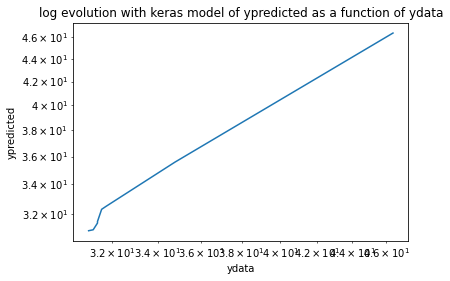

In [ ]:
import matplotlib.pyplot as plt

y_data=[]
y_predicted=[]

for k in (df.y3):
    y_data.append(k*32.401)
    
for i in range(0,8):
    test = [[xarray[i][0], xarray[i][1], xarray[i][2]]]
    testarray = np.array(test)
    a3 = model.predict(testarray)
    y_predicted.append(a3[0][0]*32.401)
    
print (y_predicted)
    
print (y_data)

plt.figure()
plt.loglog(sorted(y_predicted),sorted(y_data))
plt.xlabel('ydata')
plt.ylabel('ypredicted')
plt.title('log evolution with keras model of ypredicted as a function of ydata')
plt.show()